In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [105]:
def func(x, a, b, c):
    return a * np.sin(b*x) + c

## The model function, f(x, …). It must take the independent variable as the first argument and the parameters to fit as separate remaining arguments

In [106]:
x = np.linspace(0, 4, 500)
y = func(x, 2.5, 1.3, 0.5)
#rng = np.random.default_rng()
#y_noise = 0.5 * rng.uniform(size=x.size) #You can have rng.normal
y_noise = np.random.uniform(-10,10, x.size)
ydata = y + y_noise

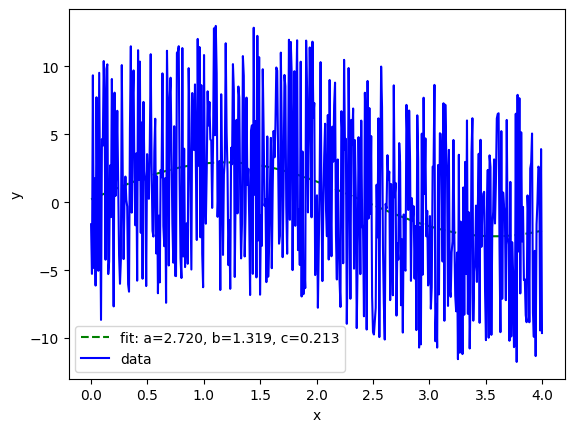

In [107]:
popt, pcov = curve_fit(func, x, ydata, bounds=([0., 0., 0.], [3., 1.5, 0.7]))  # Remove bound for unbounded model fit
plt.plot(x, func(x, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(x, ydata, 'b-', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [108]:
np.linalg.cond(pcov) 
np.diag(pcov)

array([0.12669415, 0.00637521, 0.09215007])

## Condition number of a matrix
The condition number gives an indication of the accuracy of the results from a matrix inversion and a linear equation solution. 

If the condition number is very large, that means the matrix is close to being singular. For example, if the condition number is approximately equal to one, the system is well conditioned. If it is much greater than one, the system is low conditioned.

## Diagonal values of pcov
It can be also shown using the diagonal values of pcov, np.diag(pcov): an significant order of magnitude for a parameter value indicates an accuracy issue in finding the corresponding parameter.

## Changing to a different model

Suppose that we now add another parameter d, defined as follows, then we will try observing how the condition number changes (Spoiler: for a degenrate parameter with another parameter it increases)

In [109]:
def func2(x, a, b, c, d):
    return a * (np.sin(b*x) + np.cos(d*x)) +c   # a and d are redundant
popt2, pcov2 = curve_fit(func2, x, y)
print(np.linalg.cond(pcov2))
print(np.diag(pcov2))
#print(popt)

66234550.313984565
[1.98661004e-22 1.16693481e-23 4.30135830e-22 5.00606282e-16]


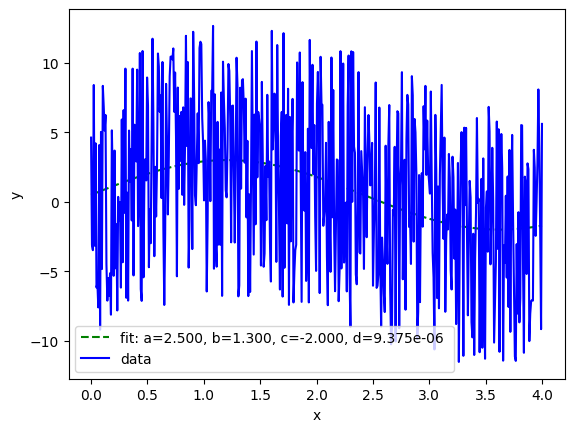

In [19]:
plt.plot(x, func2(x, *popt2), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%.3e ' % tuple(popt2))
plt.plot(x, ydata, 'b-', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

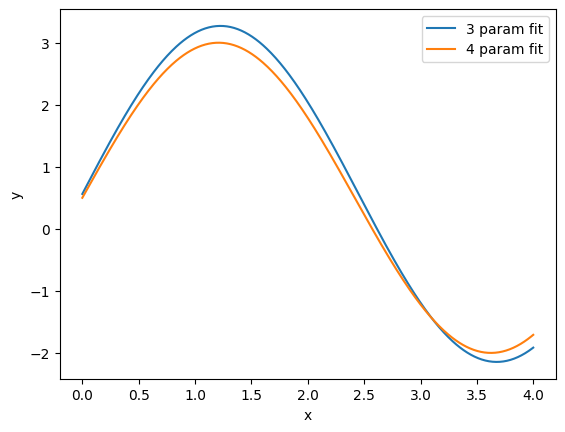

In [34]:
plt.plot(x, func(x, *popt), label="3 param fit")
plt.plot(x, func2(x, *popt2), label="4 param fit")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## A problematic case: When the function is rapidly oscillatory

The use of xscale: if one of the parameters is significantly greater than the others, the use of xscale e.g. xscale =[1,1,1000] is required. Otherwise the fit parameters cannot be obtained.

In [91]:
ydata_new = func2(x, 5, 10, 10, 10)
try:
    popt3, pcov3 = curve_fit(func, x, ydata_new, method = 'trf')
except RuntimeError as e:
    print(e)

In [92]:
popt4, pcov4 = curve_fit(func2, x, ydata_new)
popt4

array([-0.41224791,  5.86706536, 10.33479598,  2.30040177])

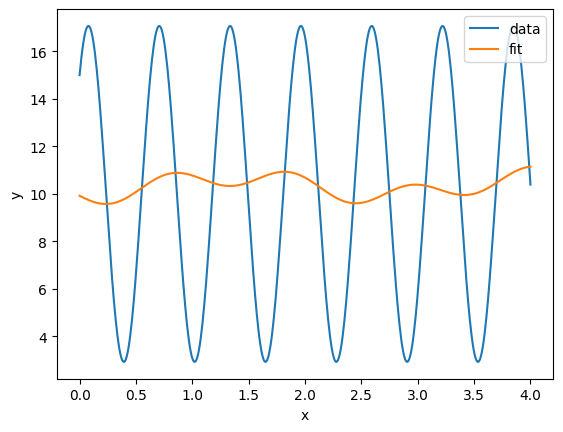

In [110]:
plt.plot(x, ydata_new, label="data")
plt.plot(x, func2(x, *popt4), label="fit")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()